In [78]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [79]:
data = pd.read_csv('/Users/lixiang/Documents/GitHub/Project2-2/Project_2-2/NL_data/ams.csv')
data.head()

,time,t2m
0,2010-01-01 00:00:00,273.37634
1,2010-01-01 01:00:00,273.35657
2,2010-01-01 02:00:00,273.28820
3,2010-01-01 03:00:00,273.26855
4,2010-01-01 04:00:00,273.21570


In [80]:

def forecast_temperature(data, window_size, prediction_horizon):
   
    # Convert 'time' to datetime
    data['time'] = pd.to_datetime(data['time'])

    # Create lagged features
    for i in range(1, window_size + 1):
        data[f't2m_last_{i}'] = data['t2m'].shift(i)

    # Create the target variable by shifting
    data['t2m_future'] = data['t2m'].shift(-prediction_horizon)

    # Drop rows with NaN values which are the result of shifting
    data = data.dropna()

    # Re-establish 'time' as the DataFrame's index
    data.set_index('time', inplace=True)

    # Splitting data into features and target
    X = data[[f't2m_last_{i}' for i in range(1, window_size + 1)]]
    y = data['t2m_future']
    
    return X, y
    

In [13]:
X, y = forecast_temperature(data, window_size=72, prediction_horizon=0)

In [14]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize and train the model
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
train_score = round(reg.score(X_train, y_train) * 100, 2)
valid_score = round(reg.score(X_test, y_test) * 100, 2)

print('Mean Squared Error (MSE):', mse)
print('Train_score:', train_score)
print('Valid_score:', valid_score)


Mean Squared Error (MSE): 0.17101987536626406
Train_score: 99.94
Valid_score: 99.56


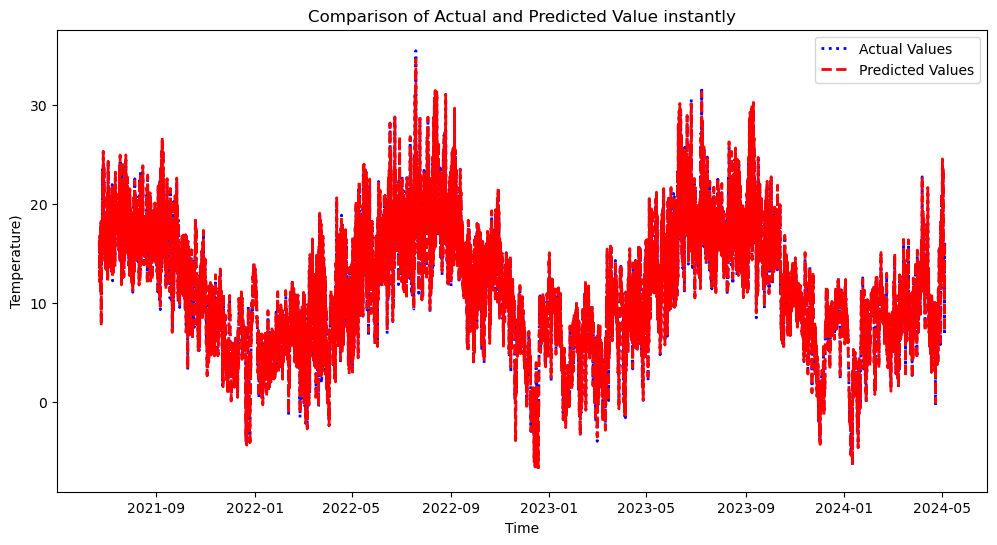

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test - 273.15, color='blue', label='Actual Values', linewidth=2, linestyle='dotted')
plt.plot(y_test.index, y_pred - 273.15, color='red', label='Predicted Values', linewidth=2, linestyle='--')
plt.title('Comparison of Actual and Predicted Value instantly')
plt.xlabel('Time')
plt.ylabel('Temperature)')
plt.legend()
plt.show()

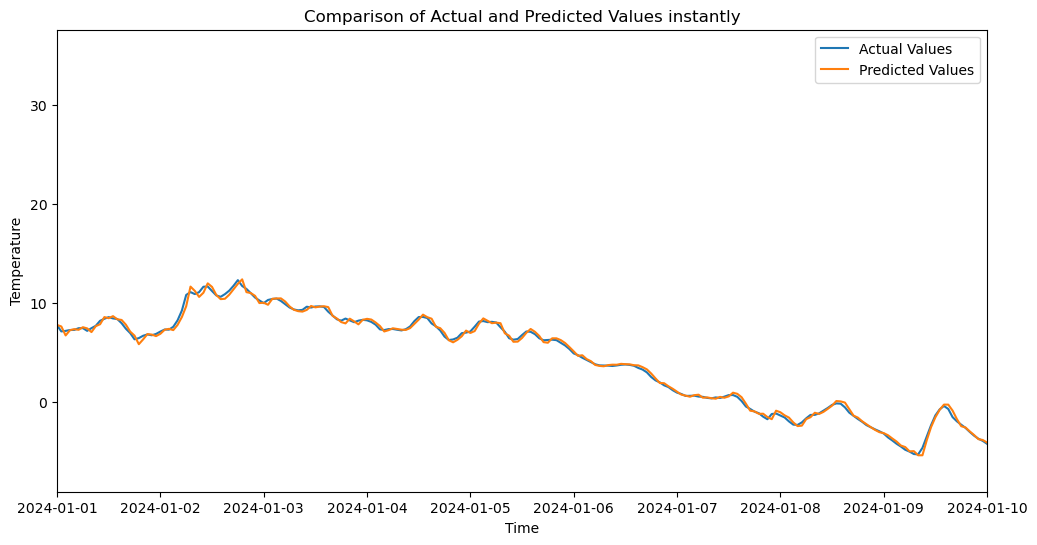

In [16]:

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test - 273.15,  label='Actual Values')
plt.plot(y_test.index, y_pred - 273.15,  label='Predicted Values')
plt.title('Comparison of Actual and Predicted Values instantly')
# Define the zoom range
zoom_start = pd.Timestamp('2024-01-01')
zoom_end = pd.Timestamp('2024-01-10') 

# Set the x-axis limit to zoom into the desired timeframe
plt.xlim(zoom_start, zoom_end)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [24]:
X, y = forecast_temperature(data, window_size=72, prediction_horizon=24)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize and train the model
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
train_score = round(reg.score(X_train, y_train) * 100, 2)
valid_score = round(reg.score(X_test, y_test) * 100, 2)
print('Mean Squared Error (MSE):', mse)
print('Train_score:', train_score)
print('Valid_score:', valid_score)



Mean Squared Error (MSE): 6.86525014821917
Train_score: 98.61
Valid_score: 82.47


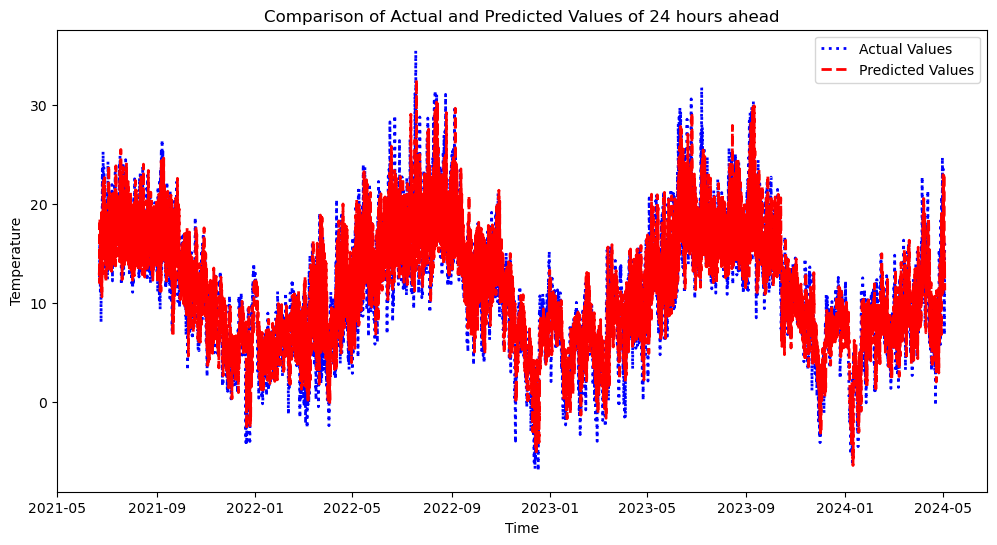

In [18]:

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test - 273.15, color='blue', label='Actual Values', linewidth=2, linestyle='dotted')
plt.plot(y_test.index, y_pred - 273.15, color='red', label='Predicted Values', linewidth=2, linestyle='--')
plt.title('Comparison of Actual and Predicted Values of 24 hours ahead')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

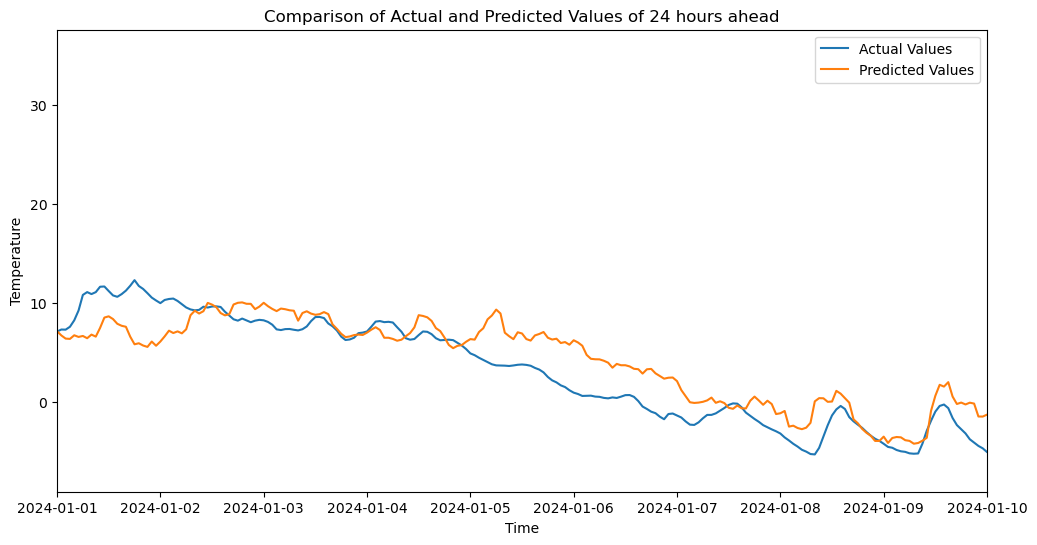

In [19]:
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test - 273.15, label='Actual Values')
plt.plot(y_test.index, y_pred - 273.15, label='Predicted Values')
zoom_start = pd.Timestamp('2024-01-01')
zoom_end = pd.Timestamp('2024-01-10') 

# Set the x-axis limit to zoom into the desired timeframe
plt.xlim(zoom_start, zoom_end)
plt.title('Comparison of Actual and Predicted Values of 24 hours ahead')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [20]:
X, y = forecast_temperature(data, window_size=72, prediction_horizon=72)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize and train the model
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
train_score = round(reg.score(X_train, y_train) * 100, 2)
valid_score = round(reg.score(X_test, y_test) * 100, 2)

print('Mean Squared Error (MSE):', mse)
print('Train_score:', train_score)
print('Valid_score:', valid_score)


Mean Squared Error (MSE): 11.468406733754817
Train_score: 97.81
Valid_score: 70.72


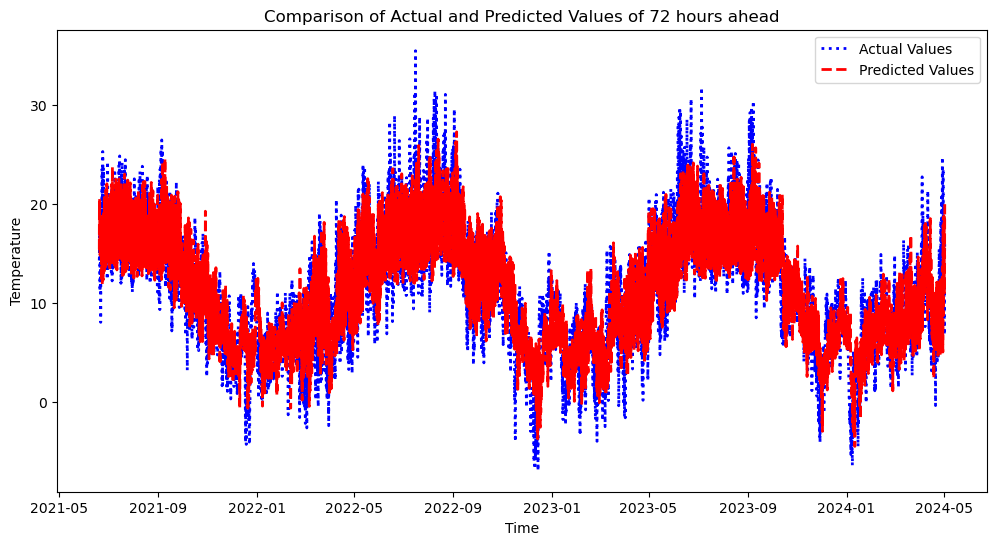

In [22]:

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test - 273.15, color='blue', label='Actual Values', linewidth=2, linestyle='dotted')
plt.plot(y_test.index, y_pred - 273.15, color='red', label='Predicted Values', linewidth=2, linestyle='--')
plt.title('Comparison of Actual and Predicted Values of 72 hours ahead')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

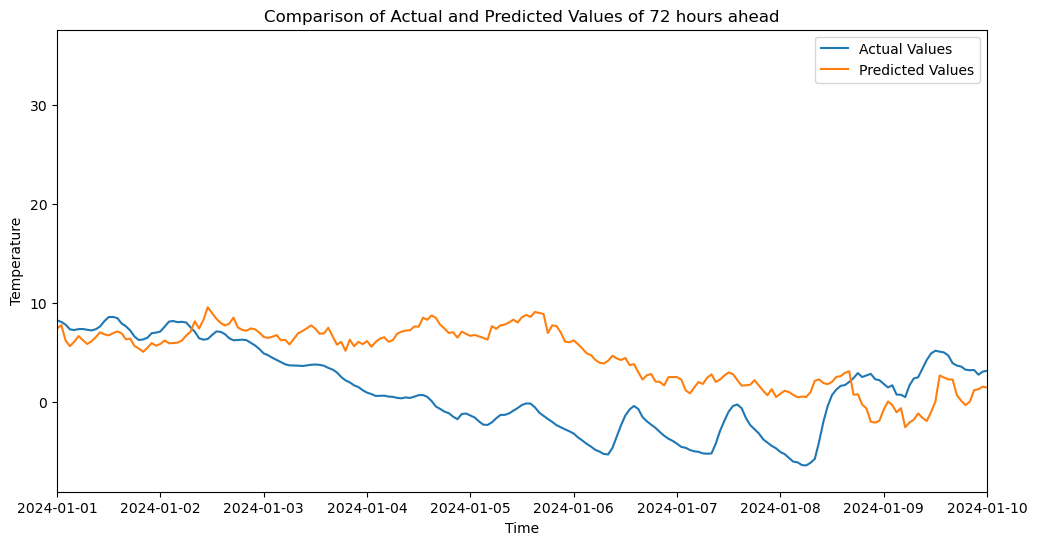

In [23]:
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test - 273.15, label='Actual Values')
plt.plot(y_test.index, y_pred - 273.15, label='Predicted Values')
zoom_start = pd.Timestamp('2024-01-01')
zoom_end = pd.Timestamp('2024-01-10') 

# Set the x-axis limit to zoom into the desired timeframe
plt.xlim(zoom_start, zoom_end)
plt.title('Comparison of Actual and Predicted Values of 72 hours ahead')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [25]:
train_data = pd.read_csv('/Users/lixiang/Documents/GitHub/Project2-2/Project_2-2/NL_data/ams.csv')
test_data = pd.read_csv('/Users/lixiang/Desktop/forecast.csv')

In [26]:
ams_df = test_data[(test_data['latitude'] == 52.25) & (test_data['longitude'] == 5.0)]
ams_df = ams_df.drop(['Unnamed: 0', 'latitude', 'step', 'number', 'valid_time','longitude', 'surface'], axis=1)
test_data = ams_df

In [27]:
# Convert 'time' to datetime
train_data['time'] = pd.to_datetime(train_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])

In [28]:
dummy_train_data = train_data.tail(1)
dummy_train_data = dummy_train_data.loc[dummy_train_data.index.repeat(10)]
dummy_train_data['time'] = dummy_train_data['time'] + pd.to_timedelta(dummy_train_data.groupby("time").cumcount(),unit='h')
dummy_train_data = dummy_train_data[1:]

In [30]:
import datetime
full_data = pd.concat([train_data, dummy_train_data, test_data])

aug_test_data = full_data[full_data['time'] >= pd.to_datetime(datetime.date(2024, 4, 29))]
aug_test_data.shape

(504, 2)

In [31]:
# Create features for training data
window_size = 71
for i in range(1, window_size + 1):
    train_data[f't2m_last_{i}'] = train_data['t2m'].shift(i)

# Create the target variable by shifting
prediction_horizon = 72
train_data['t2m_future'] = train_data['t2m'].shift(-prediction_horizon)

# Drop rows with NaN values which are the result of shifting
train_data = train_data.dropna()

# Re-establish 'time' as the DataFrame's index for training data
train_data.set_index('time', inplace=True)

# Splitting training data into features and target
X_train = train_data[[f't2m_last_{i}' for i in range(1, window_size + 1)]]
y_train = train_data['t2m_future']
    
# Process augmented test data to create features
for i in range(1, window_size + 1):
    aug_test_data[f't2m_last_{i}'] = aug_test_data['t2m'].shift(i)

# Create the target variable by shifting
aug_test_data['t2m_future'] = aug_test_data['t2m'].shift(-prediction_horizon)    

# Drop rows with NaN values which are the result of shifting in test data
aug_test_data = aug_test_data.dropna()

# Drop extra data
aug_test_data = aug_test_data[aug_test_data['time'] >= pd.to_datetime(datetime.date(2024, 5, 2))]

# Re-establish 'time' as the DataFrame's index for test data
aug_test_data.set_index('time', inplace=True)

# Splitting test data into features and target
X_test = aug_test_data[[f't2m_last_{i}' for i in range(1, window_size + 1)]]
y_test = aug_test_data['t2m_future']

/var/folders/9g/h6y919qn0nq02c7brb9xj8j40000gn/T/ipykernel_39060/1727179000.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug_test_data[f't2m_last_{i}'] = aug_test_data['t2m'].shift(i)
/var/folders/9g/h6y919qn0nq02c7brb9xj8j40000gn/T/ipykernel_39060/1727179000.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug_test_data[f't2m_last_{i}'] = aug_test_data['t2m'].shift(i)
/var/folders/9g/h6y919qn0nq02c7brb9xj8j40000gn/T/ipykernel_39060/1727179000.py:22: SettingWithCopyWarning: 
A value is trying to

In [32]:
# Initialize and train the model
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
train_score = round(reg.score(X_train, y_train) * 100, 2)
valid_score = round(reg.score(X_test, y_test) * 100, 2)

print('Mean Squared Error (MSE):', mse)
print('Train_score:', train_score)
print('Valid_score:', valid_score)

Mean Squared Error (MSE): 11.648680765470944
Train_score: 97.73
Valid_score: 25.86


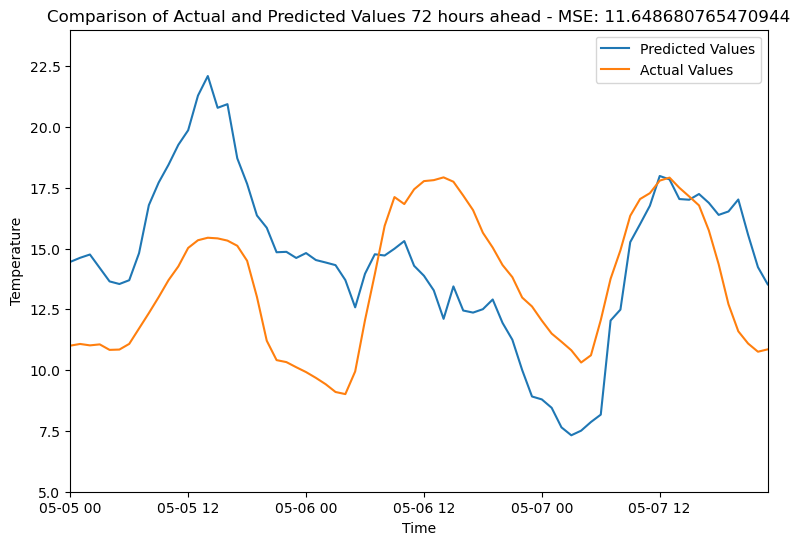

In [33]:
# Set correct time index
y_test_t = y_test.set_axis(y_test.index + pd.Timedelta(days=3))
# Plot the actual vs. predicted values
plt.figure(figsize=(9, 6))

# Plot predicted values
plt.plot(y_test_t.index, y_pred - 273.15, label='Predicted Values')
# Plot actual values
plt.plot(y_test_t.index, y_test_t - 273.15, label='Actual Values')

# Define the zoom range
zoom_start = pd.Timestamp('2024-05-05')
zoom_end = pd.Timestamp('2024-05-07 23:00:00')

# Set the x-axis limit to zoom into the desired timeframe
plt.xlim(zoom_start, zoom_end)
plt.ylim(5, 24)

# Title and labels
plt.title(f'Comparison of Actual and Predicted Values 72 hours ahead - MSE: {mse}')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()

# Show the plot
plt.show()

In [81]:
for i in range(0, 72):
    X, y = forecast_temperature(data, window_size=72, prediction_horizon=i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Initialize and train the model
    reg = RandomForestRegressor()
    reg.fit(X_train, y_train)

    # Make predictions
    y_pred = reg.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)

    print(f'Mean Squared Error (MSE) {i} hours ahead:', mse)

Mean Squared Error (MSE) 0 hours ahead: 0.17109808178728722
Mean Squared Error (MSE) 1 hours ahead: 0.5883078188398035
Mean Squared Error (MSE) 2 hours ahead: 1.1605228268813066
Mean Squared Error (MSE) 3 hours ahead: 1.786605560691173
Mean Squared Error (MSE) 4 hours ahead: 2.4065071960707076
Mean Squared Error (MSE) 5 hours ahead: 2.9961011575340994
Mean Squared Error (MSE) 6 hours ahead: 3.493609876194258
Mean Squared Error (MSE) 7 hours ahead: 3.9408835252806718
Mean Squared Error (MSE) 8 hours ahead: 4.335658367693656
Mean Squared Error (MSE) 9 hours ahead: 4.673662558218258
Mean Squared Error (MSE) 10 hours ahead: 4.953673407174949
Mean Squared Error (MSE) 11 hours ahead: 5.198749295720168
Mean Squared Error (MSE) 12 hours ahead: 5.417589922332366
Mean Squared Error (MSE) 13 hours ahead: 5.595791932285683
Mean Squared Error (MSE) 14 hours ahead: 5.755565837746972
Mean Squared Error (MSE) 15 hours ahead: 5.89578164731779
Mean Squared Error (MSE) 16 hours ahead: 6.020775567285813
M

In [84]:
X, y = forecast_temperature(data, window_size=72, prediction_horizon=72)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize and train the model
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)


print('Mean Squared Error (MSE):', mse)


Mean Squared Error (MSE): 11.445934467785806


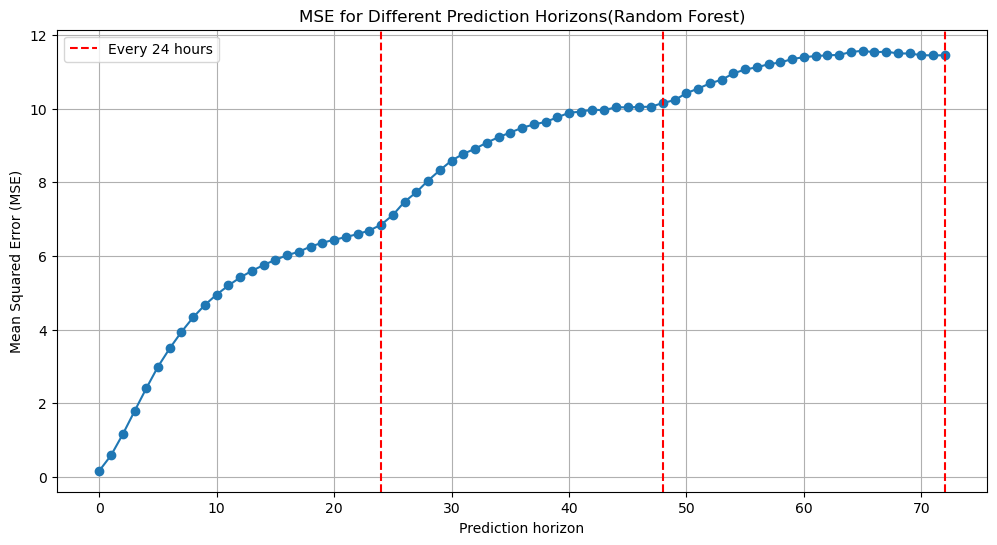

In [87]:

# MSE values
Mse = [0.17109808178728722, 0.5883078188398035, 1.1605228268813066, 1.786605560691173, 
       2.4065071960707076, 2.9961011575340994, 3.493609876194258, 3.9408835252806718, 
       4.335658367693656, 4.673662558218258, 4.953673407174949, 5.198749295720168, 
       5.417589922332366, 5.595791932285683, 5.755565837746972, 5.89578164731779, 
       6.020775567285813, 6.115769619844619, 6.255215446945036, 6.358959112490768, 
       6.439164808333787, 6.51229933703759, 6.594148051620485, 6.690597196828792, 
       6.848309933120655, 7.110312329082723, 7.472743046889352, 7.7296885619251405, 
       8.047169793674607, 8.325977207390357, 8.589108930887754, 8.771100566599273, 
       8.909024369356208, 9.076120505255183, 9.222777388675489, 9.350384011588977, 
       9.477865524595174, 9.568546720761466, 9.637072678050126, 9.760999503232206, 
       9.886054359704472, 9.917296103378218, 9.969753034361105, 9.955652208783645, 
       10.037960972852112, 10.031286977233373, 10.04379532963606, 10.050882974130834, 
       10.152980285683267, 10.229590323771905, 10.419601552077692, 10.54326620016007, 
       10.6825471419889, 10.783507018873848, 10.952707988306164, 11.062008031713056, 
       11.119198938500523, 11.20524280446467, 11.251413922547215, 11.344211629633069, 
       11.393954183756433, 11.425481801877046, 11.44533352296114, 11.456798206521858, 
       11.533768132459336, 11.570175585031254, 11.52597824380612, 11.547233797017922, 
       11.496443797026817, 11.495400649522507, 11.44935002741013, 11.443838467345932, 
       11.445934467785806]

# Plotting MSE results with vertical lines every 24 hours
plt.figure(figsize=(12, 6))
plt.plot(range(len(Mse)), Mse, marker='o', linestyle='-')
plt.xlabel('Prediction horizon')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Different Prediction Horizons(Random Forest)')

# Adding vertical lines every 24 hours
for hour in range(24, len(Mse), 24):
    plt.axvline(x=hour, color='red', linestyle='--', label='Every 24 hours' if hour == 24 else "")
plt.legend()
plt.grid(True)
plt.show()
